# Importing Necessary Modules

In [95]:
# Data manipulation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('housing.csv')

In [97]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [99]:
data.dropna(inplace=True)

In [100]:
#Model related libraries
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [102]:
train_data = X_train.join(y_train)

In [103]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,NEAR BAY,140000.0
5255,-118.48,34.07,40.0,3351.0,484.0,1564.0,523.0,8.5153,<1H OCEAN,500001.0
19457,-120.93,37.67,6.0,3491.0,657.0,2075.0,644.0,3.3844,INLAND,138500.0
2376,-119.55,36.69,21.0,1551.0,423.0,1519.0,406.0,1.7132,INLAND,55900.0
9963,-122.24,38.31,38.0,1938.0,301.0,823.0,285.0,6.1089,NEAR BAY,280800.0
...,...,...,...,...,...,...,...,...,...,...
6782,-118.16,34.11,48.0,1091.0,236.0,632.0,234.0,3.7235,<1H OCEAN,263600.0
3929,-118.55,34.19,31.0,1856.0,370.0,990.0,360.0,4.3654,<1H OCEAN,223800.0
15904,-122.41,37.74,48.0,409.0,86.0,148.0,70.0,3.6687,NEAR BAY,335000.0
13321,-117.66,34.06,39.0,1405.0,339.0,1489.0,336.0,1.6080,INLAND,91800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

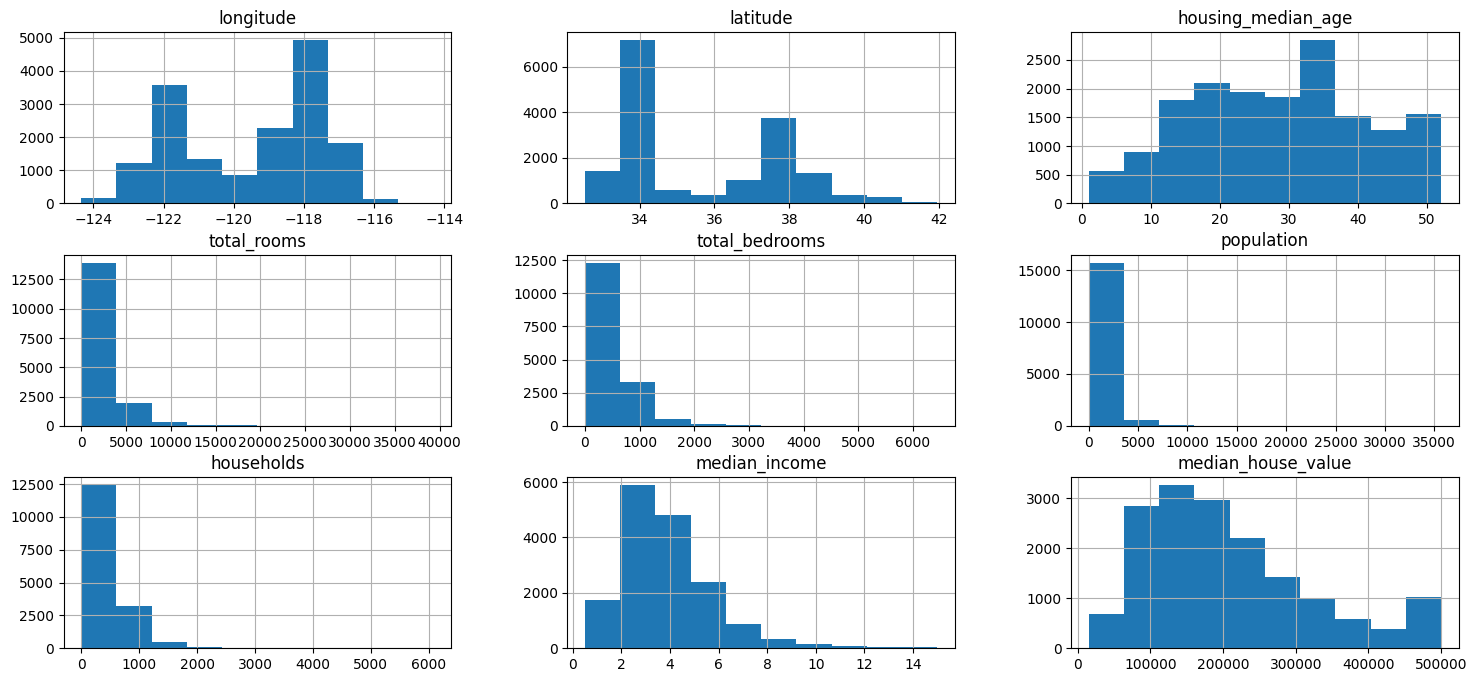

In [104]:
train_data.hist(figsize=(18,8))

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1500x800 with 0 Axes>

In [107]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1) 
train_data['population'] = np.log(train_data['population'] + 1) 
train_data['households'] = np.log(train_data['households'] + 1) 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

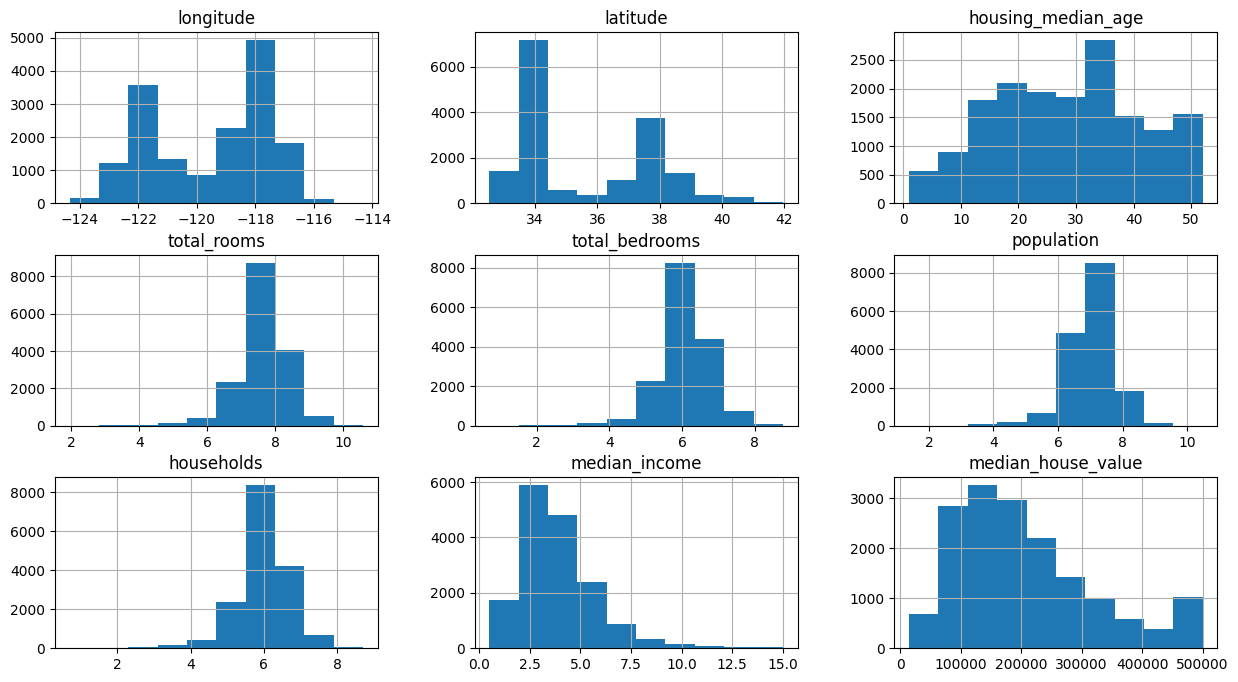

In [108]:
train_data.hist(figsize=(15,8))

In [109]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

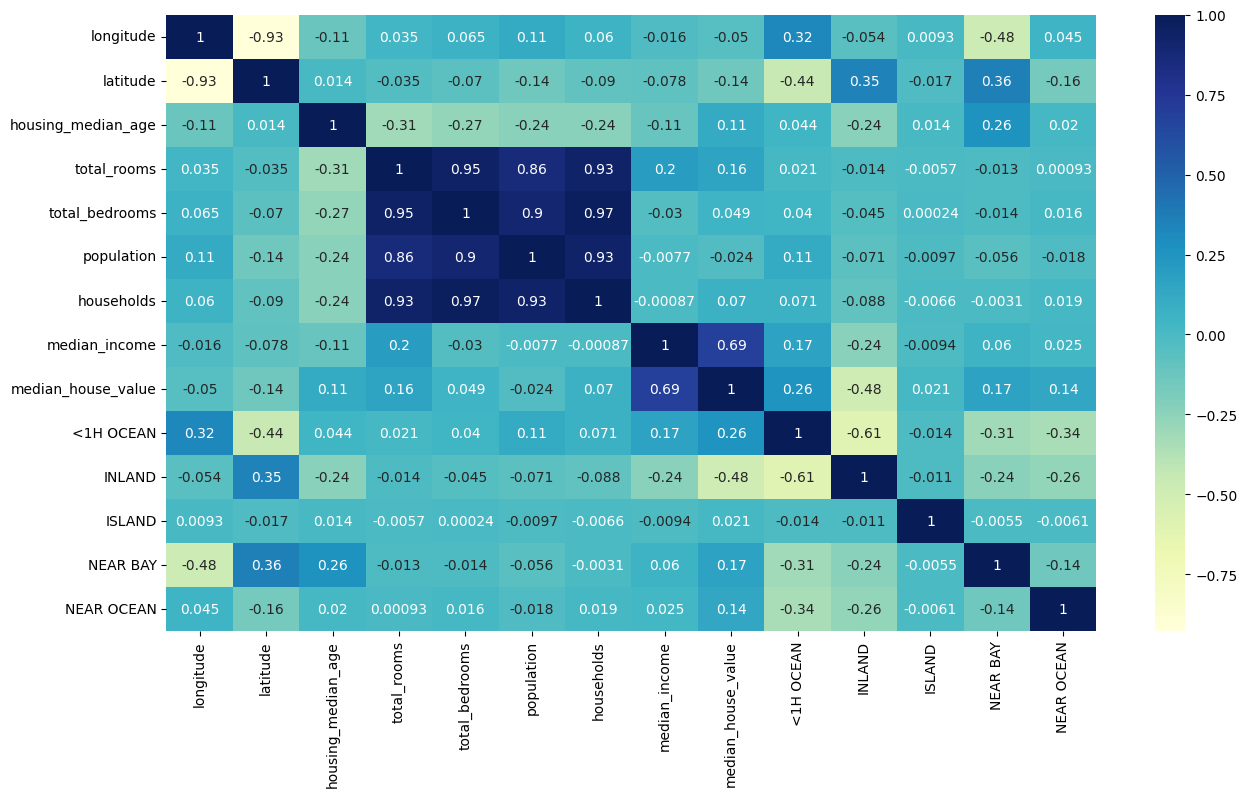

In [110]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

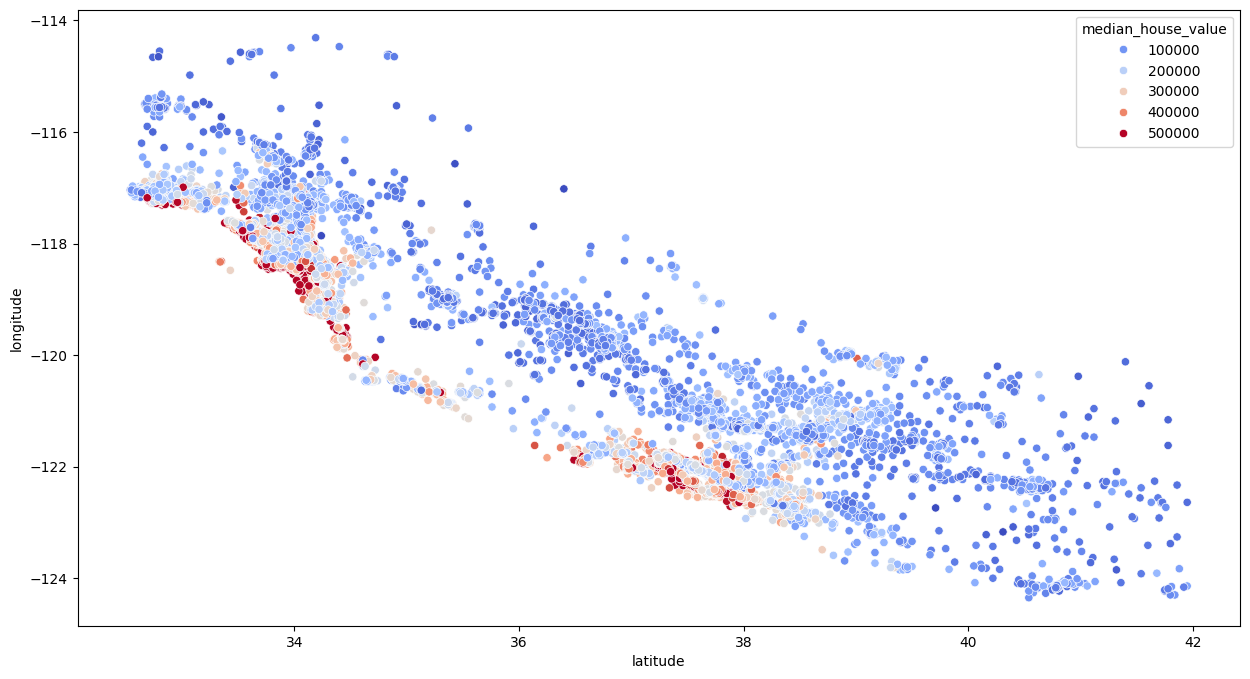

In [111]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [112]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

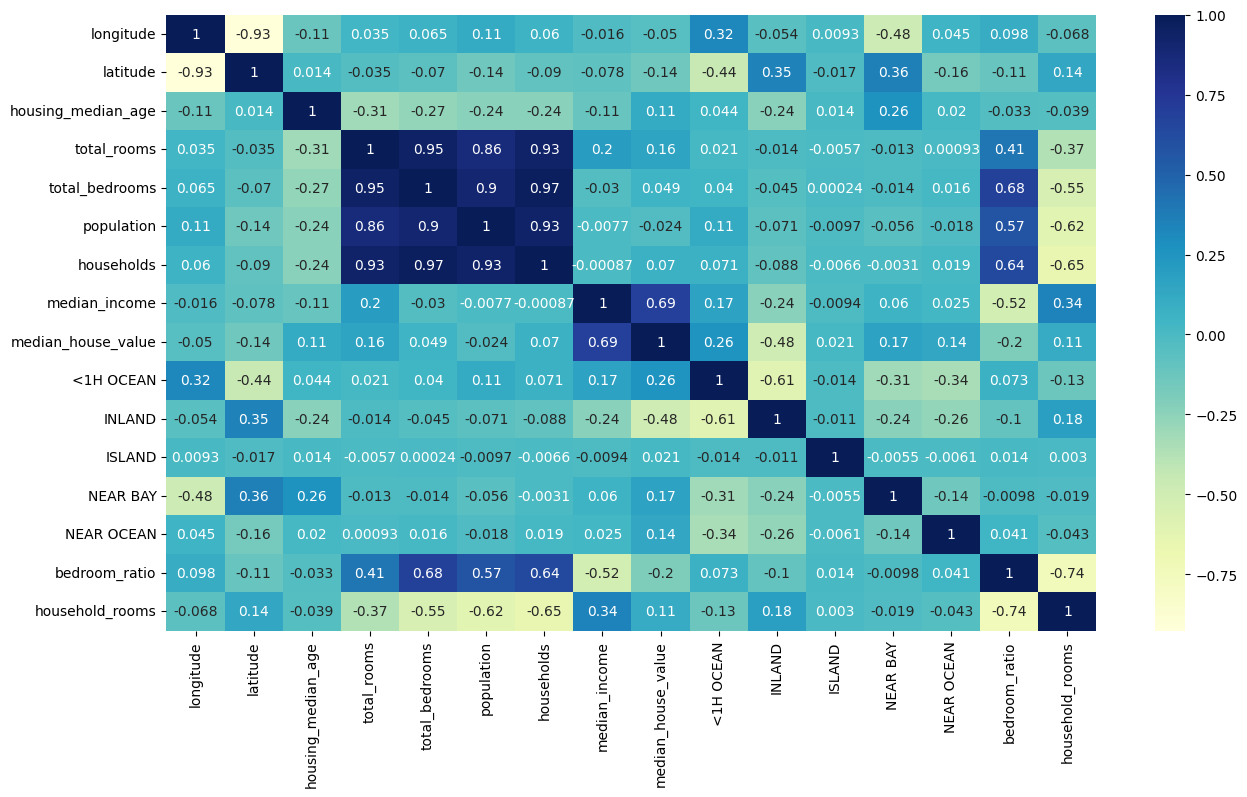

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# Using Linear Regression Model

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [126]:
reg = LinearRegression()
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

reg.fit(X_train, y_train)

LinearRegression()

In [116]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1) 
test_data['population'] = np.log(test_data['population'] + 1) 
test_data['households'] = np.log(test_data['households'] + 1) 

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [123]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [127]:
X_test_s = scaler.transform(X_test)

In [128]:
reg.score(X_test, y_test)

0.6809289753890415

# Using Random Forest Model

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [135]:
forest.score(X_test_s, y_test)

0.8191099623390121

In [136]:
from sklearn.model_selection import GridSearchCV

In [140]:
forest = RandomForestRegressor()

In [155]:
param_grid = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [None, 4, 8], 
    'min_samples_split' : [2, 4]
}

In [156]:
grid_search = GridSearchCV(
    forest, 
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [151]:
best_forest.score(X_test, y_test)

0.8181629291955829